# Clustering of Milk types using Nutrients value

## Introduction
When we go to supermarkets we see variety of milk cans and milk products. Have you ever wondered what is the difference between whole milk and the 2% reduced fat milk? Why are there so many varieties of milk and what is the difference between these varieties of milk. To understand the same and I have applied KMeans clustering to group all similar milk type based on the nutrient values.

The goal of this project is to Understand different types of clustering methods and implementing the same to cluster the different group of milks.

## Motivation 

Learning clustering in class was exciting, wanted to use the same knowledge in real world problems. Like said every step is learning I wanted to explore some dataset which is directly linked with our health and to learn how we are living a nutritiously life.  

## Related work

### Testing and Analysis
The milk nutrients can used to understand what type of milk category you are looking for. The each milk category have a wide range of nutrients value. The values of each category has a scale of its own.

### Assumption
Based on the nutrient values present in a large data set and closely analyzing the data. We understand that the nutrient values in each milk Groups are close to each other. We can assume that the nutrient values of are mostly similar to each milkGroup and thus we understand the nutrition distribution of each milk category 

## Data Import

Data Source: [USDA Agricultural Research Service](USa.philips.com/c-m-pe/face-stylers-and-grooming-kits/multigroomers/latest#filters=MULTIGROOMERS_SU)

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline

import sklearn

In [2]:
conda install -c districtdatalabs yellowbrick

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
# Upload all the datasets
import glob
glob.glob("C:\\Users\\14439\\Downloads\\SR23\\sr*.xlsx")

['C:\\Users\\14439\\Downloads\\SR23\\sr24.xlsx',
 'C:\\Users\\14439\\Downloads\\SR23\\sr25.xlsx',
 'C:\\Users\\14439\\Downloads\\SR23\\sr26.xlsx',
 'C:\\Users\\14439\\Downloads\\SR23\\sr27.xlsx',
 'C:\\Users\\14439\\Downloads\\SR23\\sr28.xlsx']

In [4]:
# Uploading different datasets into a single dataframe
import pandas as pd
all_data = pd.DataFrame()
for f in glob.glob("C:\\Users\\14439\\Downloads\\SR23\\sr*.xlsx"):
    df = pd.read_excel(f)
    all_data = all_data.append(df,ignore_index=True)

In [5]:
#check the dataframe
all_data

,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),...,Refuse_Pct,Copper_(mg),Vit_D_(µg),Vit_D_(IU),Vit_K_(µg),Panto_Acid_(mg),Choline_Tot_(mg),Vit_A_RAE_(µg)_,Lut+Zea_(µg),Vit_D_IU
0,1001,"BUTTER,WITH SALT",15.87,717.0,0.85,81.11,2.11,0.06,0.0,0.06,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1002,"BUTTER,WHIPPED,WITH SALT",15.87,717.0,0.85,81.11,2.11,0.06,0.0,0.06,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1003,"BUTTER OIL,ANHYDROUS",0.24,876.0,0.28,99.48,0.00,0.00,0.0,0.00,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1004,"CHEESE,BLUE",42.41,353.0,21.40,28.74,5.11,2.34,0.0,0.50,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1005,"CHEESE,BRICK",41.11,371.0,23.24,29.68,3.18,2.79,0.0,0.51,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41967,83110,"MACKEREL,SALTED",43.00,305.0,18.50,25.10,13.40,0.00,0.0,0.00,...,0.0,NaN,NaN,NaN,7.8,NaN,NaN,NaN,NaN,1006.0
41968,90240,"SCALLOP,(BAY&SEA),CKD,STMD",70.25,111.0,20.54,0.84,2.97,5.41,0.0,0.00,...,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,2.0
41969,90480,"SYRUP,CANE",26.00,269.0,0.00,0.00,0.86,73.14,0.0,73.20,...,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0
41970,90560,"SNAIL,RAW",79.20,90.0,16.10,1.40,1.30,2.00,0.0,0.00,...,0.0,NaN,NaN,NaN,0.1,NaN,NaN,NaN,NaN,0.0


In [6]:
all_data.head()

,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),...,Refuse_Pct,Copper_(mg),Vit_D_(µg),Vit_D_(IU),Vit_K_(µg),Panto_Acid_(mg),Choline_Tot_(mg),Vit_A_RAE_(µg)_,Lut+Zea_(µg),Vit_D_IU
0,1001,"BUTTER,WITH SALT",15.87,717.0,0.85,81.11,2.11,0.06,0.0,0.06,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1002,"BUTTER,WHIPPED,WITH SALT",15.87,717.0,0.85,81.11,2.11,0.06,0.0,0.06,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1003,"BUTTER OIL,ANHYDROUS",0.24,876.0,0.28,99.48,0.00,0.00,0.0,0.00,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1004,"CHEESE,BLUE",42.41,353.0,21.40,28.74,5.11,2.34,0.0,0.50,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1005,"CHEESE,BRICK",41.11,371.0,23.24,29.68,3.18,2.79,0.0,0.51,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Check the shape of the df
all_data.shape

(41972, 62)

In [8]:
# Filter only the products which has milk in it
df1=all_data[all_data['Shrt_Desc'].str.contains("MILK")]

In [9]:
df1

,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),...,Refuse_Pct,Copper_(mg),Vit_D_(µg),Vit_D_(IU),Vit_K_(µg),Panto_Acid_(mg),Choline_Tot_(mg),Vit_A_RAE_(µg)_,Lut+Zea_(µg),Vit_D_IU
14,1015,"CHEESE,COTTAGE,LOWFAT,2% MILKFAT",80.69,86.0,11.83,2.45,1.36,3.66,0.0,3.67,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,1016,"CHEESE,COTTAGE,LOWFAT,1% MILKFAT",82.48,72.0,12.39,1.02,1.39,2.72,0.0,2.72,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,1026,"CHEESE,MOZZARELLA,WHL MILK",50.01,300.0,22.17,22.35,3.28,2.19,0.0,1.03,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,1027,"CHEESE,MOZZARELLA,WHL MILK,LO MOIST",48.38,318.0,21.60,24.64,2.91,2.47,0.0,1.01,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,1028,"CHEESE,MOZZARELLA,PART SKIM MILK",53.78,254.0,24.26,15.92,3.27,2.77,0.0,1.13,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41838,43078,"BEVERAGE,MILKSHAKE MIX,DRY,NOT CHOC",12.80,329.0,23.50,2.60,8.20,52.90,1.6,51.30,...,0.0,NaN,NaN,NaN,0.2,NaN,NaN,NaN,NaN,0.0
41894,43352,"CHEESE,COTTAGE,LOWFAT,1% MILKFAT,NO NA",83.50,72.0,12.40,1.00,0.40,2.70,0.0,2.70,...,0.0,NaN,NaN,NaN,0.1,NaN,NaN,NaN,NaN,0.0
41900,43369,"BEVERAGES,CHOCOLATE-FLAVORED DRK,WHEY & MILK BSD",87.63,49.0,0.64,0.40,0.58,10.68,0.6,8.68,...,0.0,NaN,NaN,NaN,0.1,NaN,NaN,NaN,NaN,50.0
41911,43396,"CHEESE,COTTAGE,LOWFAT,1% MILKFAT,W/VEG",83.50,67.0,10.90,1.00,1.60,3.00,0.0,3.00,...,0.0,NaN,NaN,NaN,2.6,NaN,NaN,NaN,NaN,0.0


In [31]:
# Check the shape of the dataframe after filtering the products
df1.shape

(1225, 62)

## Data Examination and cleaning it according to our requirement
This dataset is a part of Methods and Application of Food Composition Laboratory: Beltsville, MD  which mission is to identify critical food composition needs for researchers, policymakers, food producers etc.

reference:USa.philips.com/c-m-pe/face-stylers-and-grooming-kits/multigroomers/latest#filters=MULTIGROOMERS_SU

In the above data set there are 62 different nutritional values. My goal of the project is to use the widely known milk nutritient values to identify the milk category. Thus, I have consider only 29 out of the 62 nutrients which I feel is know by a common man. The nutrients I have considered are as follows:


In [59]:
list=['Calcium_(mg)','Lipid_Tot_(g)','Energ_Kcal','Carbohydrt_(g)', 'Cholestrl_(mg)','Protein_(g)','Vit_A_IU', 'Vit_A_RAE',
       'Vit_A_RAE_(µg)_','Water_(g)','Iron_(mg)','Thiamin_(mg)','Riboflavin_(mg)','Niacin_(mg)','Panto_Acid_mg)','Vit_B6_(mg)',
       'Magnesium_(mg)', 'Phosphorus_(mg)', 'Potassium_(mg)', 'Sodium_(mg)','Ash_(g)','Zinc_(mg)', 'Copper_mg)', 'Manganese_(mg)', 'Selenium_(µg)',
       'Vit_C_(mg)','Vit_E_(mg)', 'Vit_D_IU','Vit_K_(µg)','Zinc_(mg)']

In [60]:
df=df1[list]

In [21]:
df.columns

Index(['Calcium_(mg)', 'Lipid_Tot_(g)', 'Energ_Kcal', 'Carbohydrt_(g)',
       'Cholestrl_(mg)', 'Protein_(g)', 'Vit_A_IU', 'Vit_A_RAE',
       'Vit_A_RAE_(µg)_', 'Water_(g)', 'Iron_(mg)', 'Thiamin_(mg)',
       'Riboflavin_(mg)', 'Niacin_(mg)', 'Panto_Acid_mg)', 'Vit_B6_(mg)',
       'Magnesium_(mg)', 'Phosphorus_(mg)', 'Potassium_(mg)', 'Sodium_(mg)',
       'Ash_(g)', 'Zinc_(mg)', 'Copper_mg)', 'Manganese_(mg)', 'Selenium_(µg)',
       'Vit_C_(mg)', 'Vit_E_(mg)', 'Vit_D_IU', 'Vit_K_(µg)', 'Zinc_(mg)'],
      dtype='object')

In [22]:
# Converting it into CSV file and reading the same
df.to_csv("Final_dataset_milk.csv", index=False)
df = pd.read_csv('Final_dataset_milk.csv')

In [25]:
df.head()

,Calcium_(mg),Lipid_Tot_(g),Energ_Kcal,Carbohydrt_(g),Cholestrl_(mg),Protein_(g),Vit_A_IU,Vit_A_RAE,Vit_A_RAE_(µg)_,Water_(g),...,Ash_(g),Zinc_(mg),Copper_mg),Manganese_(mg),Selenium_(µg),Vit_C_(mg),Vit_E_(mg),Vit_D_IU,Vit_K_(µg),Zinc_(mg).1
0,91.0,2.45,86.0,3.66,10.0,11.83,74.0,20.0,NaN,80.69,...,1.36,0.41,0.030,0.007,9.9,0.0,0.04,NaN,NaN,0.41
1,61.0,1.02,72.0,2.72,4.0,12.39,41.0,11.0,NaN,82.48,...,1.39,0.38,0.028,0.003,9.0,0.0,0.01,NaN,NaN,0.38
2,505.0,22.35,300.0,2.19,79.0,22.17,676.0,179.0,NaN,50.01,...,3.28,2.92,0.011,0.030,17.0,0.0,0.19,NaN,NaN,2.92
3,575.0,24.64,318.0,2.47,89.0,21.60,745.0,197.0,NaN,48.38,...,2.91,2.46,0.022,0.009,16.1,0.0,0.21,NaN,NaN,2.46
4,782.0,15.92,254.0,2.77,64.0,24.26,481.0,127.0,NaN,53.78,...,3.27,2.76,0.025,0.010,14.4,0.0,0.14,NaN,NaN,2.76


In [26]:
# Check dataframe columns
df.columns

Index(['Calcium_(mg)', 'Lipid_Tot_(g)', 'Energ_Kcal', 'Carbohydrt_(g)',
       'Cholestrl_(mg)', 'Protein_(g)', 'Vit_A_IU', 'Vit_A_RAE',
       'Vit_A_RAE_(µg)_', 'Water_(g)', 'Iron_(mg)', 'Thiamin_(mg)',
       'Riboflavin_(mg)', 'Niacin_(mg)', 'Panto_Acid_mg)', 'Vit_B6_(mg)',
       'Magnesium_(mg)', 'Phosphorus_(mg)', 'Potassium_(mg)', 'Sodium_(mg)',
       'Ash_(g)', 'Zinc_(mg)', 'Copper_mg)', 'Manganese_(mg)', 'Selenium_(µg)',
       'Vit_C_(mg)', 'Vit_E_(mg)', 'Vit_D_IU', 'Vit_K_(µg)', 'Zinc_(mg).1'],
      dtype='object')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Calcium_(mg)     1223 non-null   float64
 1   Lipid_Tot_(g)    1225 non-null   float64
 2   Energ_Kcal       1225 non-null   float64
 3   Carbohydrt_(g)   1225 non-null   float64
 4   Cholestrl_(mg)   1199 non-null   float64
 5   Protein_(g)      1225 non-null   float64
 6   Vit_A_IU         1200 non-null   float64
 7   Vit_A_RAE        803 non-null    float64
 8   Vit_A_RAE_(µg)_  201 non-null    float64
 9   Water_(g)        1225 non-null   float64
 10  Iron_(mg)        1225 non-null   float64
 11  Thiamin_(mg)     1088 non-null   float64
 12  Riboflavin_(mg)  1174 non-null   float64
 13  Niacin_(mg)      1078 non-null   float64
 14  Panto_Acid_mg)   761 non-null    float64
 15  Vit_B6_(mg)      1078 non-null   float64
 16  Magnesium_(mg)   1164 non-null   float64
 17  Phosphorus_(mg

In [30]:
# Check the shape of the dataset after 
df.shape

(1225, 30)

In [32]:
#Find any null values present in the dataset
df.isnull().sum()

Calcium_(mg)          2
Lipid_Tot_(g)         0
Energ_Kcal            0
Carbohydrt_(g)        0
Cholestrl_(mg)       26
Protein_(g)           0
Vit_A_IU             25
Vit_A_RAE           422
Vit_A_RAE_(µg)_    1024
Water_(g)             0
Iron_(mg)             0
Thiamin_(mg)        137
Riboflavin_(mg)      51
Niacin_(mg)         147
Panto_Acid_mg)      464
Vit_B6_(mg)         147
Magnesium_(mg)       61
Phosphorus_(mg)     130
Potassium_(mg)       35
Sodium_(mg)           0
Ash_(g)              12
Zinc_(mg)            61
Copper_mg)          579
Manganese_(mg)      321
Selenium_(µg)       174
Vit_C_(mg)           52
Vit_E_(mg)          531
Vit_D_IU            682
Vit_K_(µg)          670
Zinc_(mg).1          61
dtype: int64

In [34]:
# Droped all the columns which has more than 30 null values.
df_new = pd.read_csv('Final_dataset_milk.csv',usecols=[0,1,2,3,5,6,9,10,19])

In [35]:
# check again for null values
df_new.isnull().sum()

Calcium_(mg)       2
Lipid_Tot_(g)      0
Energ_Kcal         0
Carbohydrt_(g)     0
Protein_(g)        0
Vit_A_IU          25
Water_(g)          0
Iron_(mg)          0
Sodium_(mg)        0
dtype: int64

In [37]:
# Fix the Vit_A_IU null values present with mean values of the Vit_A_IU
mean_value=df_new['Vit_A_IU'].mean()
df_new['Vit_A_IU']=df_new['Vit_A_IU'].fillna(mean_value)

In [40]:
# Fix the calcium null values present with mean values of the calcium
calcium_mean_value=df_new['Calcium_(mg)'].mean()
df_new['Calcium_(mg)']=df_new['Calcium_(mg)'].fillna(calcium_mean_value)

In [41]:
df_new.isnull().sum()

Calcium_(mg)      0
Lipid_Tot_(g)     0
Energ_Kcal        0
Carbohydrt_(g)    0
Protein_(g)       0
Vit_A_IU          0
Water_(g)         0
Iron_(mg)         0
Sodium_(mg)       0
dtype: int64

## Apply clustering technique using sklearn

In [42]:
X=df_new

In [43]:
# Import sklearn 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

C:\Users\14439\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


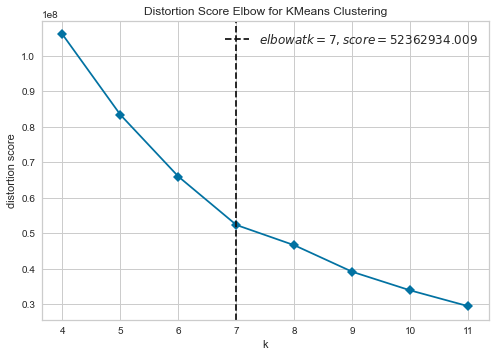

In [44]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(4,12), timings=False)
visualizer.fit(X) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure

## Inference 
From the elbow graph we get know that there are 7 clusters which can be formed. 

Since there are different types of Milk category we need to perform partitioning methods and also due to numeric values present we can use KMeans clustering. 

### KMeans Clustering

In [45]:
# Applying KMeans algorithm
km=KMeans(n_clusters=7, init='random',n_init=10, max_iter=300, tol=1e-04, random_state=0)

In [46]:
# Training the Data
y_km = km.fit_predict(X)

In [47]:
# Checking the shape of the df
y_km.shape

(1225,)

In [61]:
# Checking to which clustering category the first row belongs to (Random)
y_km[0]

3

In [62]:
# center points of each clusters
km.cluster_centers_

array([[1.41183012e+02, 2.13411565e+01, 4.71170068e+02, 6.54200000e+01,
        6.95755102e+00, 1.36513333e+02, 4.43625850e+00, 1.42156463e+00,
        1.34918367e+02],
       [9.71200000e+02, 7.91000000e+00, 3.82600000e+02, 4.09760000e+01,
        3.66320000e+01, 2.73540000e+03, 8.99800000e+00, 5.23600000e+00,
        3.83200000e+02],
       [1.33500000e+02, 1.60550000e+01, 3.14785714e+02, 2.03171429e+01,
        2.14128571e+01, 2.85714286e+00, 3.74035714e+01, 1.05071429e+00,
        1.59664286e+03],
       [8.88923767e+01, 5.08139013e+00, 1.44147982e+02, 2.02253812e+01,
        4.49085202e+00, 1.68698834e+02, 6.85622422e+01, 8.29775785e-01,
        3.76892377e+02],
       [1.28371585e+02, 2.94166667e+00, 8.17800546e+01, 1.01674454e+01,
        3.83844262e+00, 1.55124590e+02, 8.21943169e+01, 9.65232240e-01,
        6.91051913e+01],
       [1.97935484e+02, 8.07000000e+00, 2.78516129e+02, 4.71532258e+01,
        4.40225806e+00, 1.03935484e+03, 3.88412903e+01, 3.59129032e+00,
        2.8

In [50]:
km.labels_

array([3, 3, 6, ..., 4, 3, 4])

In [63]:
# Number of samples present in each cluster
unique, counts = np.unique(y_km, return_counts=True)

In [64]:
dict(zip(unique, counts))

{0: 147, 1: 25, 2: 14, 3: 223, 4: 732, 5: 31, 6: 53}

In [56]:
# checking the cluster centers
km.cluster_centers_[:,0]

array([141.18301155, 971.2       , 133.5       ,  88.89237668,
       128.3715847 , 197.93548387, 907.50943396])

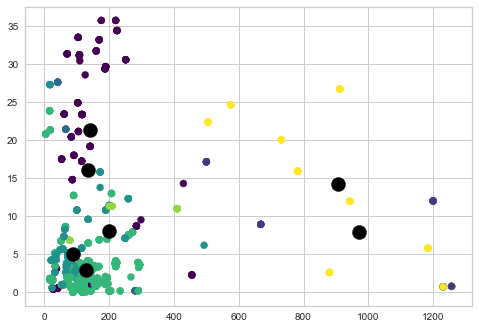

In [57]:
#Plot graph for the clusters of calcium and Lipid features
plt.scatter(X.iloc[:,[0]],X.iloc[:,[1]],c=y_km, s=50, cmap='viridis')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c='black', s=200)

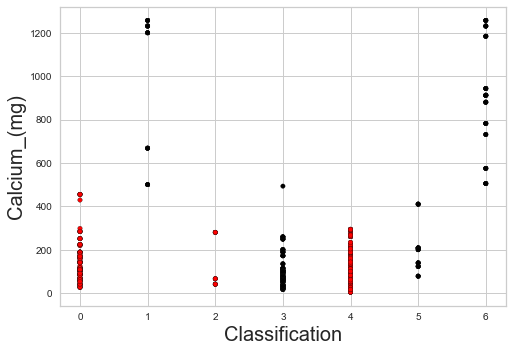

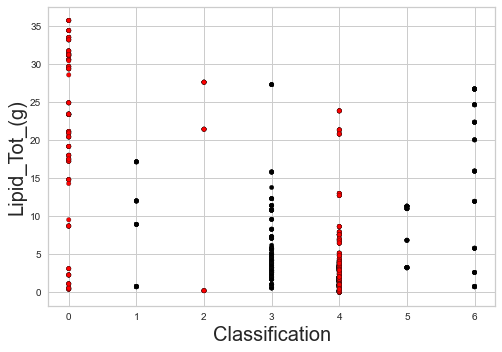

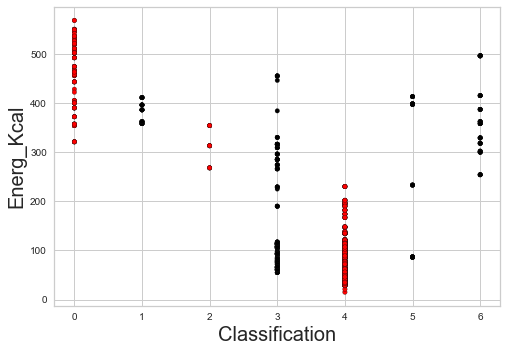

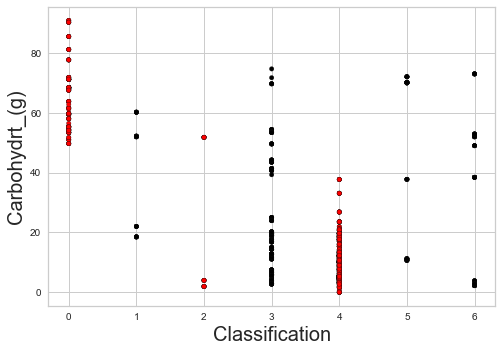

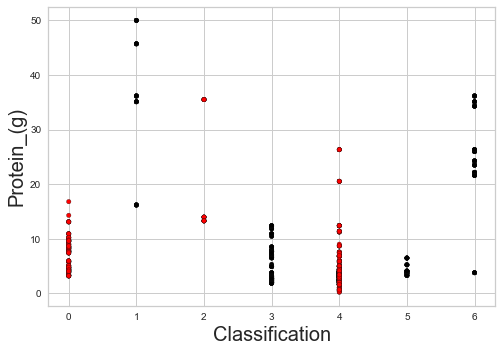

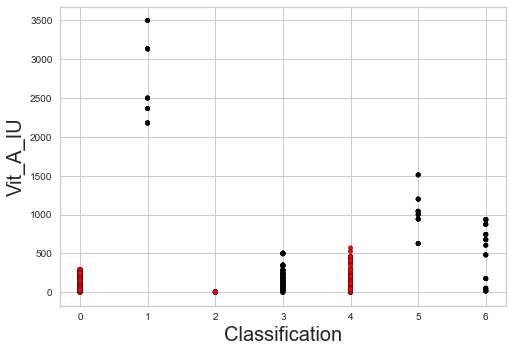

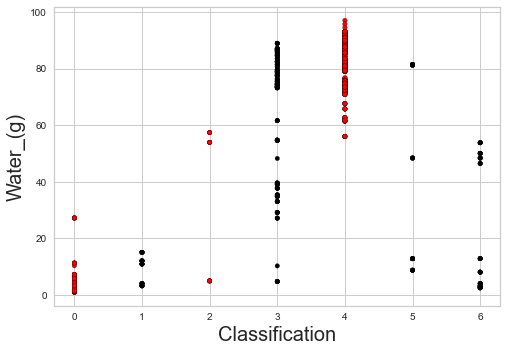

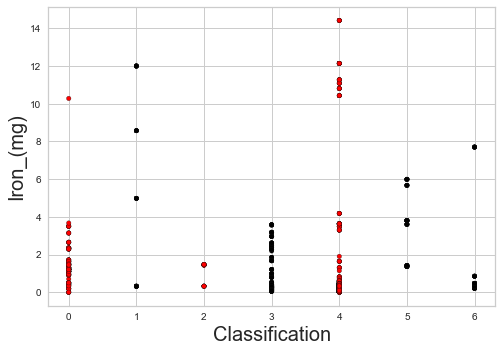

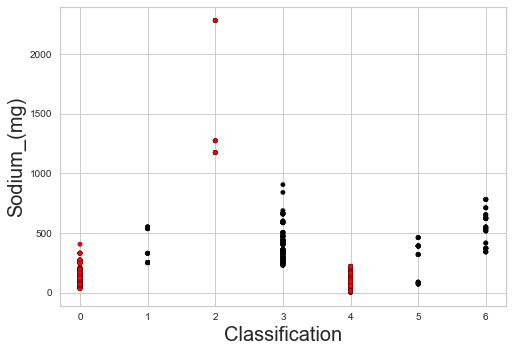

In [65]:
# Checking the cluster formation based on the individual features
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['red', 'black', 'red','black','red','black'])
for column in df_selected_features:
   q=y_km
   if column!='label':
       p=df_selected_features[column].values
       plt.scatter(q,p,c=q, cmap=cmap_bold,edgecolor='k', s=20)
       plt.xlabel('Classification', fontsize=20)
       plt.ylabel(column, fontsize=20)
       plt.show()